In [1]:
import os
import json
import pandas as pd
import random
from pathlib import Path
import numpy as np
from math import pi, cos, sin
import cv2 as cv
import matplotlib.pyplot as plt
import shutil
from circum import xy_values
import ast

In [2]:
os.chdir("../Annotation projects/ACFR/apples")

In [3]:
# all_images = os.listdir("images")

In [4]:
# val_set = random.sample(all_images,int(0.2*len(all_images)))
# test_set = random.sample(list(np.setdiff1d(all_images,val_set)),int(0.2*len(all_images)))
# train_set = np.setdiff1d(list(np.setdiff1d(all_images,val_set)),test_set)

In [5]:
# set_ = "train"
# for i in train_set:
#     src_train = os.path.join("images", i)
#     dest_train = os.path.join("{}_images".format(set_),i)
#     annot_name, ext = os.path.splitext(i)
#     src_csv = os.path.join("annotations", annot_name+".csv")
#     dest_csv = os.path.join("{}_csv".format(set_),annot_name+".csv")
#     shutil.copy(src_train,dest_train)
#     shutil.copy(src_csv,dest_csv)
    

In [6]:
train_csv = os.path.join(os.getcwd(),"train_csv")
train_images = os.path.join(os.getcwd(),"train_images")
filesList = os.listdir(train_csv)
file_ = random.choice(filesList)
df = pd.read_csv(os.path.join(train_csv,file_))
df
image_name = file_.replace(".csv",".png")

In [7]:
#for one csv file
for row in range(len(df)):
    df.at[row,"filename"] = image_name
    df.at[row,"file_size"] = Path(os.path.join(train_images,image_name)).stat().st_size
    img = cv.imread(os.path.join(train_images,image_name))
    df.at[row,"file_attributes"] = '{}'
    df.at[row,"region_count"] = len(df)
    df.at[row,'region_id'] = row
    t = {'name':'polygon','all_points_x':None,'all_points_y':None}
    x,y = xy_values(df.at[row,"c-x"],df.at[row,"c-y"],df.at[row,"radius"],img.shape[0],img.shape[1])
    t['all_points_x']  = x
    t['all_points_y'] = y
    df.at[row,'region_shape_attributes'] = object()
    df.at[row,'region_shape_attributes'] = t
    df.at[row,"region_attributes"] = '{}'

In [8]:
df["file_size"] = df["file_size"].astype("int64")
df["region_count"] = df["region_count"].astype("int64")
df['region_id'] = df['region_id'].astype("int64")

In [9]:
df.head()

,#item,c-x,c-y,radius,label,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,0,57.50,174.44,15.09,1,20130320T013147.670365_11.png,100938,{},5,0,"{'name': 'polygon', 'all_points_x': [72, 72, 7...",{}
1,1,127.22,118.33,18.14,1,20130320T013147.670365_11.png,100938,{},5,1,"{'name': 'polygon', 'all_points_x': [145, 145,...",{}
2,2,134.17,84.44,18.14,1,20130320T013147.670365_11.png,100938,{},5,2,"{'name': 'polygon', 'all_points_x': [152, 152,...",{}
3,3,258.89,153.06,16.75,1,20130320T013147.670365_11.png,100938,{},5,3,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
4,4,80.28,25.00,15.92,1,20130320T013147.670365_11.png,100938,{},5,4,"{'name': 'polygon', 'all_points_x': [96, 96, 9...",{}


In [10]:
df[df["filename"]=="20130320T004808.759514.Cam6_22.png"]

,#item,c-x,c-y,radius,label,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes


## LOOP THROUGH ALL 3 SETS

In [11]:
for set_ in ["train","val","test"]:
    if os.path.exists("{}.csv".format(set_)):
        continue
    metadf_apples = pd.DataFrame(columns=['#item', 'c-x', 'c-y', 'radius', 'label', 'filename', 'file_size',
           'file_attributes', 'region_count', 'region_id',
           'region_shape_attributes', 'region_attributes'])

    apples = os.path.join(os.getcwd(),"{}_csv".format(set_))
    apples_images = os.path.join(os.getcwd(),"{}_images".format(set_))
    filesList = os.listdir(apples)
    for index,files in enumerate(filesList):
        file_path = os.path.join(apples,files)
        df = pd.read_csv(file_path)
        image_name = files.replace(".csv",".png")
        for row in range(len(df)):
            df.at[row,"filename"] = image_name
            img = cv.imread(os.path.join(apples_images,image_name))
            df.at[row,"file_size"] = Path(os.path.join(apples_images,image_name)).stat().st_size
            df.at[row,"file_attributes"] = '{}'
            df.at[row,"region_count"] = len(df)
            df.at[row,'region_id'] = row
            t = {"name":"polygon","all_points_x":None,"all_points_y":None}
            x,y = xy_values(df.at[row,"c-x"],df.at[row,"c-y"],df.at[row,"radius"],img.shape[1],img.shape[0])
            t['all_points_x']  = x
            t['all_points_y'] = y
            df.at[row,'region_shape_attributes'] = object()
            df.at[row,'region_shape_attributes'] = t
            df.at[row,"region_attributes"] = '{}'
        metadf_apples = pd.concat([metadf_apples, df], ignore_index=True, sort = False)
    headers = ['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
           'region_shape_attributes', 'region_attributes']
    metadf_apples2 = metadf_apples[headers]
    metadf_apples2.to_csv("{}.csv".format(set_), index = False)

## TEST

In [12]:
# Note that this section will only effected on the last item on the 
# sets loop. We presume that if the testing shows good results
# on the one time it should also be same for all the other items.

# It looks OK.

10
20130320T005134.287508.Cam6_32.png


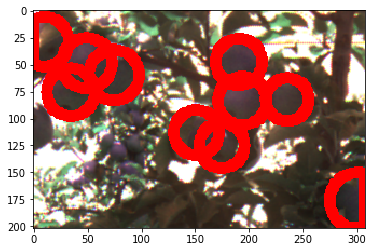

In [24]:
set2 = "test"
metadf22 = pd.read_csv("{}.csv".format(set2))
a = metadf22.loc[metadf22["filename"]==random.choice(metadf22["filename"].unique())]
a = a.reset_index(drop=True)
print(len(a))
image = cv.imread(os.path.join("{}_images".format(set2),a.iloc[0]["filename"]))
print(a.iloc[0]["filename"])
all_points = []
for i in range(len(a)):
    pts = []
    x = ast.literal_eval(a.iloc[i]["region_shape_attributes"])["all_points_x"]
    y = ast.literal_eval(a.iloc[i]["region_shape_attributes"])["all_points_y"]
    for i,j in zip(x,y):
        pts.append([i,j])
    all_points.append(pts)

ptss = np.array(all_points)
img = cv.polylines(image,np.int32(ptss),isClosed=True,color=(255,0,0),thickness=10)
plt.imshow(image)
plt.show()
plt.close()

## Generate file names for all 3 sets

In [27]:
def WriteSets(set_path, set_name):
    files = os.listdir(set_path)
    if os.path.exists("sets/{}_filenames.txt".format(set_name)):
        print("File already exist. Skipping")
        return None
    with open("sets/{}_filenames.txt".format(set_name),"a+") as fp:
        for line in files:
            if line.startswith("via"): #skip annotations file
                continue
            fp.write(line+"\n")

In [28]:
train_images = "train_images"
test_images = "test_images"
val_images = "val_images"
all_images = "images"
WriteSets(train_images,"acfr_apples_train")
WriteSets(test_images,"acfr_apples_test")
WriteSets(val_images,"acfr_apples_val")
WriteSets(all_images,"acfr_apples_all")

## ROUGH SPACE

In [42]:
image = cv.imread("images/20130320T005947.821546.Cam6_21.png")
print(image.shape[0])
print(image.shape[1])
df = pd.read_csv("./test_csv/20130320T005947.821546.Cam6_21.csv")
df

202
308


,#item,c-x,c-y,radius,label
0,0,51.67,196.67,24.25,1
1,1,65.28,100.56,24.25,1
2,2,132.22,97.78,28.42,1
3,3,153.06,55.28,23.98,1
4,4,60.83,48.89,20.92,1
5,5,98.06,26.39,20.92,1
6,6,23.89,92.22,20.92,1
7,7,39.44,92.50,20.92,1


In [43]:
all_points = []
for i in range(len(df)):
    print(df.at[i,"c-x"])
    x,y = xy_values(xx=df.at[i,"c-x"],yy=df.at[i,"c-y"],radius=df.at[i,"radius"],width=image.shape[1],height=image.shape[0],n=98)
    pts = []
    for j,k in zip(x,y):
        pts.append([j,k])
    all_points.append(pts)

51.67
65.28
132.22
153.06
60.83
98.06
23.89
39.44


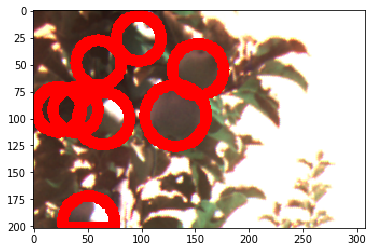

In [44]:
ptss = np.array(all_points)
img = cv.polylines(image,np.int32(ptss),isClosed=True,color=(255,0,0),thickness=10)
plt.imshow(image)
plt.show()
plt.close()

## Split images and csv annotations into train and test

In [6]:
all_images = os.path.join(os.getcwd(),"images")
all_csv = os.path.join(os.getcwd(),"annotations_csv")

In [15]:
#copy train images into train images folder
train = random.sample(os.listdir(all_images),int(0.8*1120))

In [24]:
for image in train:
    source_image = os.path.join(os.getcwd(),"images",image)
    destination_image = os.path.join(os.getcwd(),"train_images",image)
    shutil.move(source_image,destination_image)
    csv_name = image.replace(".png",".csv")
    source_csv = os.path.join(os.getcwd(),"annotations_csv",csv_name)
    destination_csv = os.path.join(os.getcwd(),"train_csv",csv_name)
    shutil.move(source_csv,destination_csv)

In [33]:
headers = ['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']

In [35]:
apples = "../Fruits/dataset/apples/dataset/val_csv"
apples_images = "../Fruits/dataset/apples/dataset/val"

In [36]:
filesList = os.listdir(apples)
file_ = random.choice(filesList)
df = pd.read_csv(os.path.join(apples,file_))
df
image_name = file_.replace(".csv",".png")

In [37]:
['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']

['filename',
 'file_size',
 'file_attributes',
 'region_count',
 'region_id',
 'region_shape_attributes',
 'region_attributes']

In [38]:
#for one csv file
for row in range(len(df)):
    df.at[row,"filename"] = image_name
    df.at[row,"file_size"] = Path(os.path.join(apples_images,image_name)).stat().st_size
    img = cv.imread(os.path.join(apples_images,image_name))
    df.at[row,"file_attributes"] = '{}'
    df.at[row,"region_count"] = len(df)
    df.at[row,'region_id'] = row
    t = {'name':'polygon','all_points_x':None,'all_points_y':None}
    x,y = xy_values(df.at[row,"c-x"],df.at[row,"c-y"],df.at[row,"radius"],img.shape[0],img.shape[1])
    t['all_points_x']  = x
    t['all_points_y'] = y
    df.at[row,'region_shape_attributes'] = object()
    df.at[row,'region_shape_attributes'] = t
    df.at[row,"region_attributes"] = '{}'

In [39]:
df["file_size"] = df["file_size"].astype("int64")
df["region_count"] = df["region_count"].astype("int64")
df['region_id'] = df['region_id'].astype("int64")

In [40]:
df.columns

Index(['#item', 'c-x', 'c-y', 'radius', 'label', 'filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes'],
      dtype='object')

In [41]:
df

,#item,c-x,c-y,radius,label,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,0,175.48,96.45,24.51,1,20130320T004811.616698.Cam6_13.png,92503,{},12,0,"{'name': 'polygon', 'all_points_x': [199, 199,...",{}
1,1,164.52,53.87,23.55,1,20130320T004811.616698.Cam6_13.png,92503,{},12,1,"{'name': 'polygon', 'all_points_x': [188, 188,...",{}
2,2,130.00,30.00,23.55,1,20130320T004811.616698.Cam6_13.png,92503,{},12,2,"{'name': 'polygon', 'all_points_x': [153, 153,...",{}
3,3,167.10,7.74,23.55,1,20130320T004811.616698.Cam6_13.png,92503,{},12,3,"{'name': 'polygon', 'all_points_x': [190, 190,...",{}
4,4,196.13,37.42,23.55,1,20130320T004811.616698.Cam6_13.png,92503,{},12,4,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
5,5,245.48,66.45,23.55,1,20130320T004811.616698.Cam6_13.png,92503,{},12,5,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
6,6,278.71,48.71,22.90,1,20130320T004811.616698.Cam6_13.png,92503,{},12,6,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
7,7,285.16,86.77,23.87,1,20130320T004811.616698.Cam6_13.png,92503,{},12,7,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
8,8,266.45,135.81,22.90,1,20130320T004811.616698.Cam6_13.png,92503,{},12,8,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
9,9,237.74,174.52,22.90,1,20130320T004811.616698.Cam6_13.png,92503,{},12,9,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}


In [42]:
metadf = pd.DataFrame(columns=['#item', 'c-x', 'c-y', 'radius', 'label', 'filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes'])

apples = "../Fruits/dataset/apples/dataset/val_csv"
apples_images = "../Fruits/dataset/apples/dataset/val"
filesList = os.listdir(apples)
for index,files in enumerate(filesList):
    file_path = os.path.join(apples,files)
    df = pd.read_csv(file_path)
    image_name = files.replace(".csv",".png")
    for row in range(len(df)):
        df.at[row,"filename"] = image_name
        img = cv.imread(os.path.join(apples_images,image_name))
        df.at[row,"file_size"] = Path(os.path.join(apples_images,image_name)).stat().st_size
        df.at[row,"file_attributes"] = '{}'
        df.at[row,"region_count"] = len(df)
        df.at[row,'region_id'] = row
        t = {"name":"polygon","all_points_x":None,"all_points_y":None}
        x,y = xy_values(df.at[row,"c-x"],df.at[row,"c-y"],df.at[row,"radius"],img.shape[0],img.shape[1])
        t['all_points_x']  = x
        t['all_points_y'] = y
        df.at[row,'region_shape_attributes'] = object()
        df.at[row,'region_shape_attributes'] = t
        df.at[row,"region_attributes"] = '{}'
    metadf = pd.concat([metadf, df], ignore_index=True)

/home/kiprono/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [43]:
metadf.head()

,#item,c-x,c-y,file_attributes,file_size,filename,label,radius,region_attributes,region_count,region_id,region_shape_attributes
0,0,170.62,159.69,{},98334.0,20130320T004403.421053.Cam6_32.png,1,24.39,{},1.0,0.0,"{'name': 'polygon', 'all_points_x': [195, 194,..."
1,0,195.81,110.00,{},108751.0,20130320T005044.762746.Cam6_62.png,1,13.87,{},3.0,0.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
2,1,216.13,124.19,{},108751.0,20130320T005044.762746.Cam6_62.png,1,15.16,{},3.0,1.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
3,2,295.81,89.35,{},108751.0,20130320T005044.762746.Cam6_62.png,1,11.29,{},3.0,2.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
4,0,87.50,62.22,{},120851.0,20130320T005748.390478.Cam6_53.png,1,20.09,{},4.0,0.0,"{'name': 'polygon', 'all_points_x': [107, 107,..."


In [44]:
metadf["file_size"] = metadf["file_size"].astype("int64")
metadf["region_count"] = metadf["region_count"].astype("int64")
metadf['region_id'] = metadf['region_id'].astype("int64")

In [45]:
metadf2=metadf.drop(['#item', 'c-x','c-y','radius','label'], axis = 1) 

In [46]:
metadf2.head()

,file_attributes,file_size,filename,region_attributes,region_count,region_id,region_shape_attributes
0,{},98334,20130320T004403.421053.Cam6_32.png,{},1,0,"{'name': 'polygon', 'all_points_x': [195, 194,..."
1,{},108751,20130320T005044.762746.Cam6_62.png,{},3,0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
2,{},108751,20130320T005044.762746.Cam6_62.png,{},3,1,"{'name': 'polygon', 'all_points_x': [201, 201,..."
3,{},108751,20130320T005044.762746.Cam6_62.png,{},3,2,"{'name': 'polygon', 'all_points_x': [201, 201,..."
4,{},120851,20130320T005748.390478.Cam6_53.png,{},4,0,"{'name': 'polygon', 'all_points_x': [107, 107,..."


In [47]:
metadf2 = metadf[['filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']]

In [49]:
metadf2.to_csv(os.path.join(apples_images,'train_final.csv'),index=False)

In [23]:
#Note: Make sure to replace ' with " on the CSV

In [2]:
images = "../Fruits/dataset/apples/dataset/train"

In [3]:
annotations = json.load(open("via_project_apples.json"))
annotations = list(annotations.values())
annotations = [a for a in annotations if a['regions']]

In [4]:
annotations[20]

{'filename': '20130320T005452.005817.Cam6_63.png',
 'size': '93395',
 'regions': [{'shape_attributes': {'name': 'polygon',
    'all_points_x': [255,
     255,
     255,
     255,
     255,
     255,
     254,
     254,
     253,
     252,
     252,
     251,
     250,
     249,
     249,
     248,
     247,
     246,
     245,
     244,
     242,
     241,
     240,
     239,
     238,
     237,
     236,
     234,
     233,
     232,
     231,
     230,
     229,
     228,
     227,
     226,
     225,
     224,
     224,
     223,
     222,
     222,
     221,
     221,
     220,
     220,
     220,
     220,
     220,
     220,
     220,
     220,
     220,
     220,
     221,
     221,
     222,
     222,
     223,
     224,
     224,
     225,
     226,
     227,
     228,
     229,
     230,
     231,
     232,
     233,
     234,
     236,
     237,
     238,
     239,
     240,
     241,
     242,
     244,
     245,
     246,
     247,
     248,
     249,
     249,
     250,
 

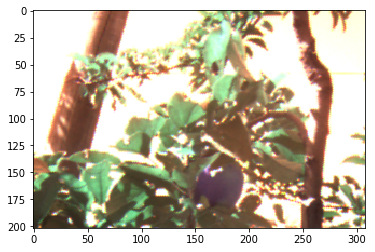

0 98 98 195 184 20130320T004403.421053.Cam6_32.png (202, 308, 3)
1 98 98 107 82 20130320T005748.390478.Cam6_53.png (202, 308, 3)
2 98 98 172 34 20130320T004928.380174.Cam6_52.png (202, 308, 3)
3 98 98 278 122 20130320T012845.190374_42.png (202, 308, 3)
4 98 98 42 195 20130320T005544.578414.Cam6_22.png (202, 308, 3)
5 98 98 88 201 20130320T005553.530973.Cam6_13.png (202, 308, 3)
6 98 98 87 177 20130320T005809.533784.Cam6_12.png (202, 308, 3)
7 98 98 89 205 20130320T005617.912359.Cam6_63.png (202, 308, 3)
8 98 98 132 178 20130320T005108.382236.Cam6_11.png (202, 308, 3)
9 98 98 132 100 20130320T005326.289805.Cam6_63.png (202, 308, 3)
10 98 98 240 117 20130320T004756.568760.Cam6_41.png (202, 308, 3)
11 98 98 215 179 20130320T005044.000731.Cam6_21.png (202, 308, 3)
12 98 98 283 111 20130320T013349.958479_61.png (202, 308, 3)
13 98 98 117 80 20130320T005132.192216.Cam6_23.png (202, 308, 3)
14 98 98 252 45 20130320T005320.384934.Cam6_24.png (202, 308, 3)
15 98 98 100 56 20130320T013611.866233

In [11]:
images = "../Fruits/dataset/apples/dataset/train"
#image = cv.imread(os.path.join(images,a["filename"]))
for j in range(len(annotations)):
    a = annotations[j]
    x = a["regions"][0]["shape_attributes"]["all_points_x"]
    y = a["regions"][0]["shape_attributes"]["all_points_y"]
    image = cv.imread(os.path.join(images,a["filename"]))
    if j==0:
        image = cv.imread(os.path.join(images,a["filename"]))
        plt.imshow(image)
        plt.show()
    print(j,len(x),len(y),max(x),max(y),a["filename"],image.shape)
    if j ==20:
        break
    

In [102]:
a = annotations[0]
a["filename"]

'20130320T004403.421053.Cam6_32.png'

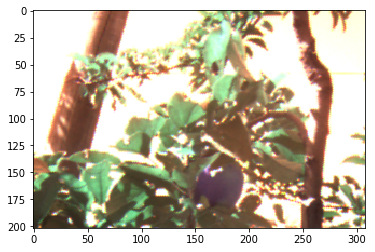

In [95]:
image = cv.imread(os.path.join(images,a["filename"]))
plt.imshow(image)


In [109]:
x = a["regions"][0]["shape_attributes"]["all_points_x"]
y = a["regions"][0]["shape_attributes"]["all_points_y"]

In [110]:
pts = []
for i,j in zip(x,y):
    pts.append([i,j])

In [111]:
pts = np.array(pts)

In [112]:
img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

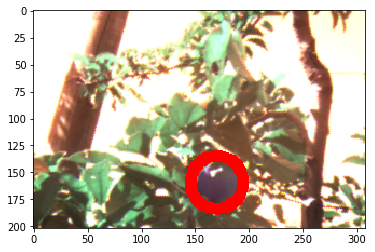

In [113]:
plt.imshow(img)

In [116]:
len(x)

98

In [117]:
len(y)

98